In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
%matplotlib inline

In [2]:
characters = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789/\|!@#$%^&*()_+=-{}[]~`"

In [3]:
def gen_seq(array, length, string=""):
    if len(string) == length:
        array.append(string)
    else:
        for char in characters:
            gen_seq(array, length, string+char)

In [4]:
arr = []
gen_seq(arr,3)
print(len(arr))
arr.sort()

614125


In [80]:
def find_inflection( arr):
    mod_ln = len(arr)/20
    points = []
    past = arr[0]
    for i, item in enumerate(arr):
        if item != past:
            points.append(i-1)
            points.append(i)
            points.append(i+1)
            past = item
        if i % mod_ln == 0:
            points.append(i)
    return points

inflect = find_inflection([x.startswith("*") for x in arr])

In [81]:
outp = []
inp = []
for index in inflect:
    inp.append(arr[index])
    if arr[index].startswith("*"):
        outp.append(1)
    else:
        outp.append(0)

In [82]:
df = pd.DataFrame({ 'input' : pd.Series(inp),
                    'output' : pd.Series(outp)
                  })

In [83]:
sns.set(style="whitegrid", color_codes=True)

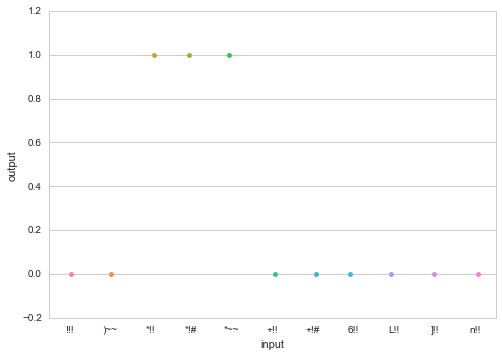

In [84]:
sns.stripplot(x="input", y="output", data=df, jitter=True)

In [78]:
df

,input,output
0,!!!,0
1,)~~,0
2,*!!,1
3,*!#,1
4,*~~,1
5,+!!,0
6,+!#,0
